In [100]:
import numpy as np

birth_rate = 0
death_rate = 0
beta = 1.7 # rate of infection per infected person
alpha = 1 / 2  #incubation rate of 2, i.e. 2 days from exposed to infected
gamma = 1 / 14 #time to recover
N = 1000


CONSTANTS  = (birth_rate, death_rate, beta, alpha, gamma, N)

def get_next_state(current_state, delta_t, arguments):
    
    """
    current_state = tuple of 4 floats, denoting S, E, I, R at the current state.
    arguments = tuple of 5 floatings, denoting birth_rate, death_rate, beta, alpha, gamma, N
    """
    S, E, I, R = current_state
    birth_rate, death_rate, beta, alpha, gamma, N = arguments
    next_s = S + delta_t*((birth_rate - (death_rate * S) - (beta * (I/N) * S)))
    next_e = E + delta_t*(beta * (I/N) * S - (death_rate + alpha) * E)
    next_i = I + delta_t*((alpha * E) - ((gamma + death_rate) * I))
    next_r = R + delta_t*((gamma * I) - (death_rate * R))
    
    return next_s, next_e, next_i, next_r




current_state = (N - 1, 1, 0, 0)

start_t = 0
delta_t = 1
last_t = 100

state = [current_state]
for current_t in np.arange(start_t + delta_t, last_t, delta_t):
    next_state = get_next_state(current_state, delta_t, CONSTANTS)
    current_state = next_state
    state.append(current_state)
    



    


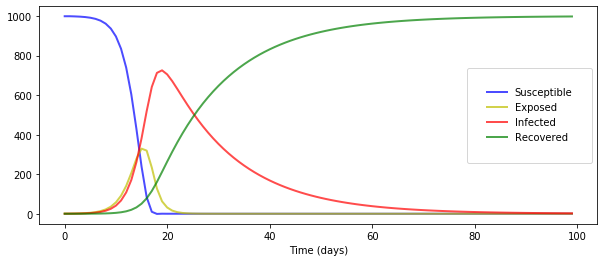

In [101]:
import matplotlib.pyplot as plt


all_s = [i[0] for i in state]
all_e = [i[1] for i in state]
all_i = [i[2] for i in state]
all_r = [i[3] for i in state]
all_t = list(np.arange(start_t, last_t, delta_t))

f, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(all_t, all_s, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(all_t, all_e, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(all_t, all_i, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(all_t, all_r, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax.set_xlabel('Time (days)')
legend = ax.legend(borderpad=2.0)
plt.show()